A. Import Library

In [1]:
#import library
import pandas as pd #read data
import matplotlib.pyplot as plt #draw charts
import numpy as np #data processing
import seaborn as sns #draw charts
from sklearn.preprocessing import MinMaxScaler #Normalize data
#from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
#Layers to build model
from keras.models import Sequential #input
from keras.layers import LSTM #deep learning
from keras.layers import Dropout,BatchNormalization #avoid learning by heart
from keras.layers import Dense #output
from keras.optimizers import AdamW
#Check the correctness of the model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import time
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import EarlyStopping, Callback
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
# from google.colab import drive

In [2]:
# import joblib
# import os

In [3]:
# drive.mount('/content/drive')
# drive_save_dir = '/content/drive/MyDrive/DATN/DATN/models_WQIpredictions'
# os.makedirs(drive_save_dir, exist_ok=True)
# print(f"Models will be saved in: {drive_save_dir}")

B. Read Data

In [4]:
path = 'https://drive.google.com/uc?export=download&id=1Mux3k8va5dVI7C7kvK0Dix6L-QYTxFn0'
df = pd.read_csv(path)
df = df.drop(index=0)

C. Describe Data

In [5]:
df.shape

(1896, 25)

In [6]:
df.head()

,Place,Điểm Quan Trắc,Tỉnh,Huyện,Tọa độ,Ngày quan trắc,Nhiệt độ,pH,DO,Độ dẫn,...,TSS,COD,Aeromonas tổng số,Edwardsiella ictaluri,Aeromonas hydrophila,Coliform,WQI,CHẤT LƯỢNG NƯỚC,CHỈ TIÊU VƯỢT NGƯỠNG,KHUYẾN CÁO
1,19.0,Tân Công Sính 1,Đồng Tháp,Tam Nông,"10,678892\n 105,522353",06/06/2023,28,7,4,598,...,"37,5","23,7",2255,Âm tính,Dương tính,4300,16.0,Xấu,"N-NO2-vượt ngưỡng 5,3 lần, N-NH4+vượt ngưỡng 1...",Chất lượng nước xấu do các chất chỉ thị ô nhiễ...
2,5.0,Cầu Kênh Ông Cò - Vĩnh Trạch,An Giang,Thoại Sơn,"10,323100\n 105,330400",12/06/2023,31.0,7.5,4.0,321,...,65.5,8.3,1873,Âm tính,Dương tính,NaN,43.0,Trung bình,"N-NO2- vượt ngưỡng 2 lần, N-NH4+ vượt ngưỡng 7...",Ô nhiễm dinh dưỡng và vi khuẩn Aeromonas tăng ...
3,3.0,Kênh Cái Sao - Bờ Hồ- Mỹ Thới,An Giang,Long Xuyên,"10,318856\n 105,442842",11/06/2023,30.5,7.5,4.5,320,...,63.5,9.4,610,Dương tính,Dương tính,NaN,49.0,Trung bình,"N-NO2- vượt ngưỡng 2 lần, N-NH4+ vượt ngưỡng 7...","Ô nhiễm dinh dưỡng, có sự hiện diện của Edward..."
4,11.0,Tây An – Mỹ Thới,An Giang,Long Xuyên,"10,341778\n 105,449056",11/06/2023,30.6,7.5,4.5,302,...,49.5,7.0,891,Âm tính,Dương tính,NaN,51.0,Trung bình,"N-NO2- vượt ngưỡng 1.6 lần, N-NH4+ vượt ngưỡng...","Ô hiễm dinh dưỡng, có sự hiện diện của Aeromon..."
5,15.0,Sông Tiền - Tân Khánh Đông,Đồng Tháp,Sa Đéc,"10,366667\n 105,728611",11/06/2023,28.0,7.0,4.0,271,...,27.0,3.7,280,Âm tính,Dương tính,NaN,93.0,Rất tốt,Aeromonas hydrophila: Dương tính.,Có sự hiện diện của Aeromonas hydrophila diệt ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 1 to 1896
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Place                  1896 non-null   float64
 1   Điểm Quan Trắc         1896 non-null   object 
 2   Tỉnh                   1896 non-null   object 
 3   Huyện                  1896 non-null   object 
 4   Tọa độ                 1896 non-null   object 
 5   Ngày quan trắc         1896 non-null   object 
 6   Nhiệt độ               1896 non-null   object 
 7   pH                     1896 non-null   object 
 8   DO                     1896 non-null   object 
 9   Độ dẫn                 1896 non-null   object 
 10  Độ kiềm                1896 non-null   object 
 11  N-NO2                  1896 non-null   object 
 12  N-NH4                  1896 non-null   object 
 13  P-PO4                  1896 non-null   object 
 14  H2S                    1896 non-null   object 
 15  TSS 

In [8]:
df.isnull().sum()

,0
Place,0
Điểm Quan Trắc,0
Tỉnh,0
Huyện,0
Tọa độ,0
Ngày quan trắc,0
Nhiệt độ,0
pH,0
DO,0
Độ dẫn,0


D. Data preprocessing

In [9]:
#row0 = df.iloc[[0]].copy()
df = df.rename(columns={'Độ dẫn': 'EC', 'Aeromonas tổng số': 'AH'})
numeric_columns = [
    'Nhiệt độ', 'pH', 'DO', 'EC', 'Độ kiềm', 'N-NO2', 'N-NH4',
    'P-PO4', 'TSS', 'H2S', 'COD', 'Coliform', 'AH'
]
values_to_replace_with_zero = ['KPH', '< 1', '<1']
replace_map_zero = {val: 0 for val in values_to_replace_with_zero}

df[numeric_columns] = df[numeric_columns].replace(replace_map_zero)
df[numeric_columns] = df[numeric_columns].replace(',', '.', regex=True)

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df[numeric_columns] = df[numeric_columns].fillna(0)
#df.dropna()
#df = pd.concat([row0, df.iloc[1:]], ignore_index=True)
df['Ngày quan trắc'] = pd.to_datetime(df['Ngày quan trắc'], format='%d/%m/%Y', errors='coerce')

EDA Exploratory Data Analysis

In [10]:
print("Performing initial EDA...")
df_analysis = df[['pH', 'DO', 'EC', 'N-NO2', 'N-NH4', 'P-PO4', 'TSS', 'COD', 'AH', 'WQI']].copy()
df_analysis['WQI'] = pd.to_numeric(df_analysis['WQI'], errors='coerce')
df_analysis = df_analysis.dropna()
print("Initial descriptive statistics:")
print(df_analysis.describe())

Performing initial EDA...
Initial descriptive statistics:
                pH           DO            EC        N-NO2        N-NH4  \
count  1894.000000  1894.000000   1894.000000  1894.000000  1894.000000   
mean      7.224604     4.189599    309.649419     0.031336     0.155555   
std       0.279813     0.578906    987.751844     0.044436     0.291411   
min       6.000000     2.500000      2.000000     0.000000     0.000000   
25%       7.000000     4.000000    166.000000     0.008250     0.038000   
50%       7.200000     4.000000    213.000000     0.015000     0.067000   
75%       7.500000     4.500000    256.000000     0.038000     0.134000   
max       8.000000     7.200000  17940.000000     0.623000     5.031000   

             P-PO4           TSS          COD            AH          WQI  
count  1894.000000   1894.000000  1894.000000   1894.000000  1894.000000  
mean      0.044467     58.794826     5.305121   1068.236536    85.612988  
std       0.078457   1043.557740     2.73

In [11]:
#df.to_csv('/content/drive/MyDrive/DATN/DATN/data1.csv', index=False)

In [12]:
num_features_eda = len(df_analysis.columns) -1
rows_eda = (num_features_eda // 3) + (num_features_eda % 3 > 0)

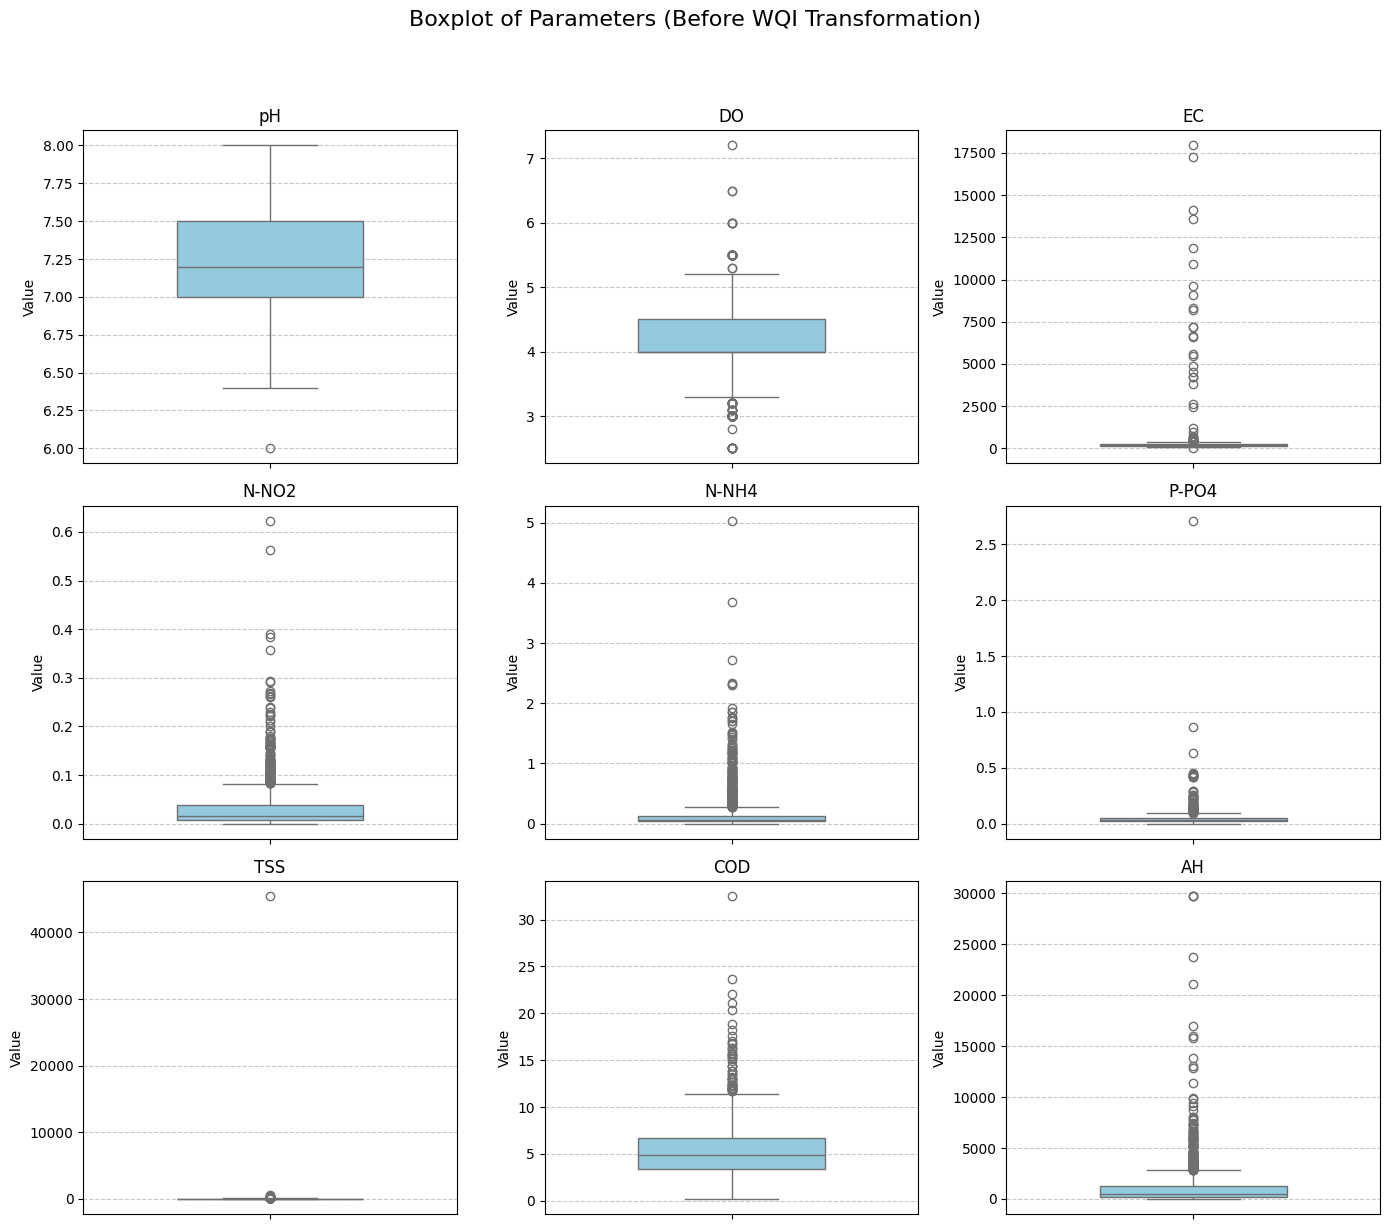

In [13]:
# Box plots
plt.figure(figsize=(14, 4 * rows_eda))
plt.suptitle("Boxplot of Parameters (Before WQI Transformation)", fontsize=16, y=1.02)
for i, column in enumerate(df_analysis.columns):
    if column == 'WQI':
        continue
    plt.subplot(rows_eda, 3, i + 1)
    sns.boxplot(y=df_analysis[column], color='skyblue', width=0.5)
    plt.title(f'{column}', fontsize=12)
    plt.ylabel('Value', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

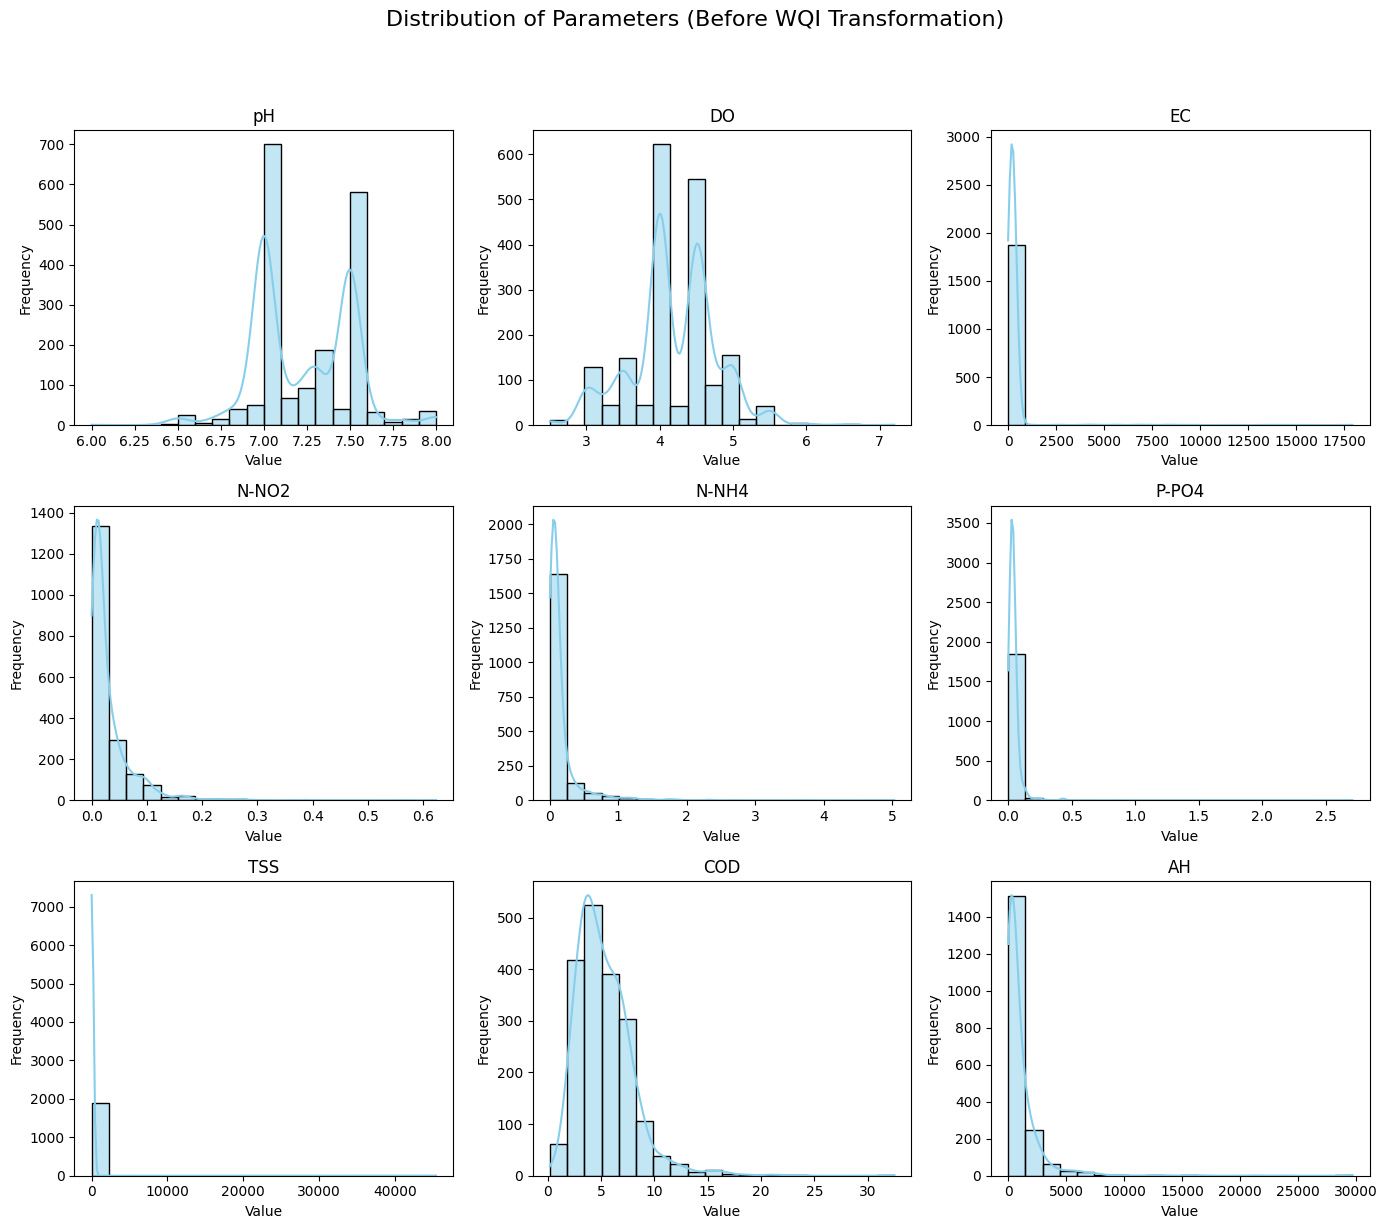

Initial EDA plots generated.


In [14]:
# Histograms
plt.figure(figsize=(14, 4 * rows_eda))
plt.suptitle("Distribution of Parameters (Before WQI Transformation)", fontsize=16, y=1.02)
for i, column in enumerate(df_analysis.columns):
    if column == 'WQI':
        continue
    plt.subplot(rows_eda, 3, i + 1)
    sns.histplot(df_analysis[column], kde=True, bins=20, color='skyblue')
    plt.title(f'{column}', fontsize=12)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout
plt.show()
print("Initial EDA plots generated.")

In [15]:
print("Calculating WQI sub-indices (vectorized)...")
# pH -> Q_pH
conditions_ph = [ df['pH'] < 5.5, (df['pH'] >= 5.5) & (df['pH'] < 6.5), (df['pH'] >= 6.5) & (df['pH'] < 8.5),
(df['pH'] >= 8.5) & (df['pH'] < 9.5), df['pH'] >= 9.5 ]
choices_ph = [ 1, 99 * df['pH'] - 543.5, 100, -99 * df['pH'] + 941.5, 1 ]
df['Q_pH'] = np.select(conditions_ph, choices_ph, default=np.nan) # Use NaN for safety if conditions don't cover all cases

# EC -> Q_EC
conditions_ec = [ df['EC'] <= 1500, (df['EC'] > 1500) & (df['EC'] < 4500), df['EC'] >= 4500 ]
choices_ec = [ 100, -0.033*df['EC'] + 149.5, 1 ]
df['Q_EC'] = np.select(conditions_ec, choices_ec, default=np.nan)

# DO -> Q_DO
conditions_do = [ df['DO'] <= 3, (df['DO'] > 3) & (df['DO'] < 5), (df['DO'] >= 5) & (df['DO'] < 7), (df['DO'] >= 7) & (df['DO'] < 11), df['DO'] >= 11 ]
choices_do = [ 1, 49.5 * df['DO'] - 147.5, 100, -24.75 * df['DO'] + 273.25, 1 ] # Corrected formula for 7-11 range based on original code intention
df['Q_DO'] = np.select(conditions_do, choices_do, default=np.nan)

# TSS -> Q_TSS
conditions_tss = [ df['TSS'] <= 50, (df['TSS'] > 50) & (df['TSS'] < 150), df['TSS'] >= 150 ]
choices_tss = [ 100, -0.99 * df['TSS'] + 149.5, 1 ]
df['Q_TSS'] = np.select(conditions_tss, choices_tss, default=np.nan)

# COD -> Q_COD
conditions_cod = [ df['COD'] <= 10, (df['COD'] > 10) & (df['COD'] < 20), df['COD'] >= 20 ]
choices_cod = [ 100, -9.9 * df['COD'] + 199, 1 ]
df['Q_COD'] = np.select(conditions_cod, choices_cod, default=np.nan)

# N-NH4 -> Q_N-NH4
conditions_nnh4 = [ df['N-NH4'] <= 0.3, (df['N-NH4'] > 0.3) & (df['N-NH4'] < 1.7), df['N-NH4'] >= 1.7 ]
choices_nnh4 = [ 100, -70.71 * df['N-NH4'] + 121.21, 1 ]
df['Q_N-NH4'] = np.select(conditions_nnh4, choices_nnh4, default=np.nan)

# N-NO2 -> Q_N-NO2
conditions_nno2 = [ df['N-NO2'] <= 0.1, (df['N-NO2'] > 0.1) & (df['N-NO2'] < 1), df['N-NO2'] >= 1 ]
choices_nno2 = [ 100, -111.1 * df['N-NO2'] + 111, 1 ]
df['Q_N-NO2'] = np.select(conditions_nno2, choices_nno2, default=np.nan)

# P-PO4 -> Q_P-PO4
conditions_ppo4 = [ df['P-PO4'] <= 0.1, (df['P-PO4'] > 0.1) & (df['P-PO4'] < 0.5), df['P-PO4'] >= 0.5 ]
choices_ppo4 = [ 100, -247.5 * df['P-PO4'] + 124.75, 1 ]
df['Q_P-PO4'] = np.select(conditions_ppo4, choices_ppo4, default=np.nan)

# AH -> Q_AH
conditions_ah = [ df['AH'] <= 1000, (df['AH'] > 1000) & (df['AH'] < 3000), df['AH'] >= 3000 ]
choices_ah = [ 100, -0.0495 * df['AH'] + 149.5, 1 ]
df['Q_AH'] = np.select(conditions_ah, choices_ah, default=np.nan)

# Power Transformation
print("Applying power transformation (vectorized)...")
q_columns = ['Q_pH', 'Q_EC', 'Q_DO', 'Q_TSS', 'Q_COD', 'Q_N-NH4', 'Q_N-NO2', 'Q_P-PO4', 'Q_AH']
powers = [0.11, 0.06, 0.10, 0.13, 0.10, 0.13, 0.10, 0.12, 0.15]

for col, power in zip(q_columns, powers):
    # Ensure non-negative before power, replace negative with NaN (or 0 if preferred)
    # WQI sub-indices should ideally be non-negative, but this adds safety.
    df[col] = np.where(df[col] < 0, np.nan, df[col])
    df[col] = df[col] ** power
#Final Data Preparation for Modeling
print("Final data preparation...")
# Define columns for final features and target
q_cols_final = [ 'Q_pH','Q_EC','Q_DO', 'Q_TSS','Q_COD', 'Q_N-NH4','Q_N-NO2','Q_P-PO4','Q_AH']
target_col = 'WQI'
df[target_col] = pd.to_numeric(df[target_col], errors='coerce')
df_model = df.dropna(subset=q_cols_final + [target_col]).copy()

Calculating WQI sub-indices (vectorized)...
Applying power transformation (vectorized)...
Final data preparation...


Generating correlation heatmap...


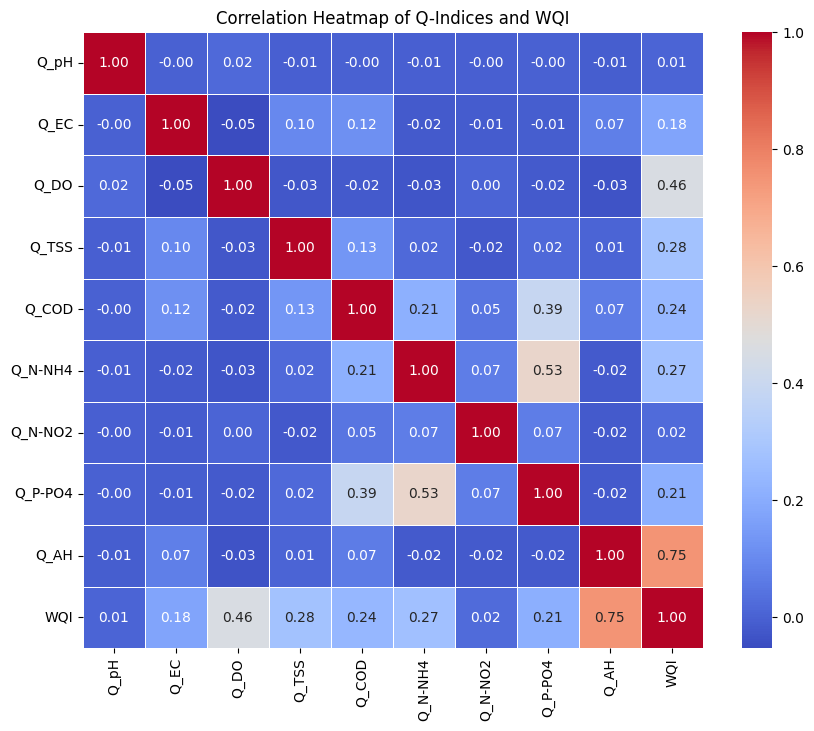

In [16]:
print("Generating correlation heatmap...")
plt.figure(figsize=(10, 8)) # Adjusted size slightly
corr_matrix = df_model[q_cols_final + [target_col]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Correlation Heatmap of Q-Indices and WQI")
plt.show()

In [17]:
# Load data q_cols_final'Q_pH','Q_EC','Q_COD','Q_N-NO2','Q_P-PO4',
features = df_model[[ 'Q_DO', 'Q_TSS','Q_AH', 'Q_N-NH4']]
target = df_model[target_col]

# Scale features
scaler = MinMaxScaler()
X_train_raw, X_test_raw, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

# Store predictions
o = {}
results = {}


In [18]:
def evaluate_model(name, model, X_test_data, y_true):
    start_time = time.time()
    y_pred = model.predict(X_test_data).flatten() if hasattr(model, 'predict') else model.predict(X_test_data)
    duration = time.time() - start_time

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE': mape, 'Duration': duration}
    o[name] = y_pred

    print(f"\n--- {name} Model Evaluation ---")
    print(f'Training/Prediction Duration: {duration:.2f} seconds')
    print(f'MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}, MAPE: {mape:.2f}%')

    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted for {name}')
    plt.xlabel('Actual WQI')
    plt.ylabel('Predicted WQI')
    plt.show()

*Random* Forest, XGB, GBR, SVR, MLP

Training Random Forest...

--- Random Forest Model Evaluation ---
Training/Prediction Duration: 0.01 seconds
MAE: 1.0045, MSE: 7.6987, RMSE: 2.7746, R^2: 0.9668, MAPE: 1.39%


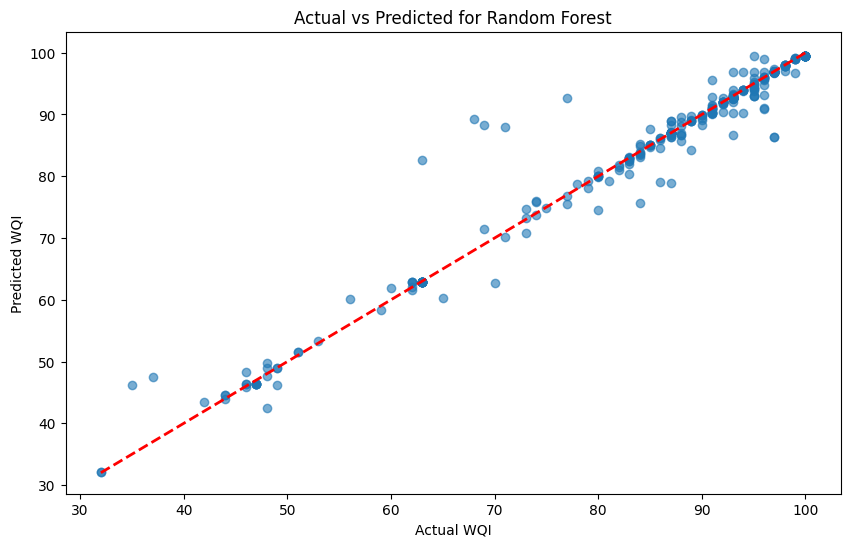

Training Gradient Boosting...

--- Gradient Boosting Model Evaluation ---
Training/Prediction Duration: 0.00 seconds
MAE: 1.0676, MSE: 6.8351, RMSE: 2.6144, R^2: 0.9705, MAPE: 1.46%


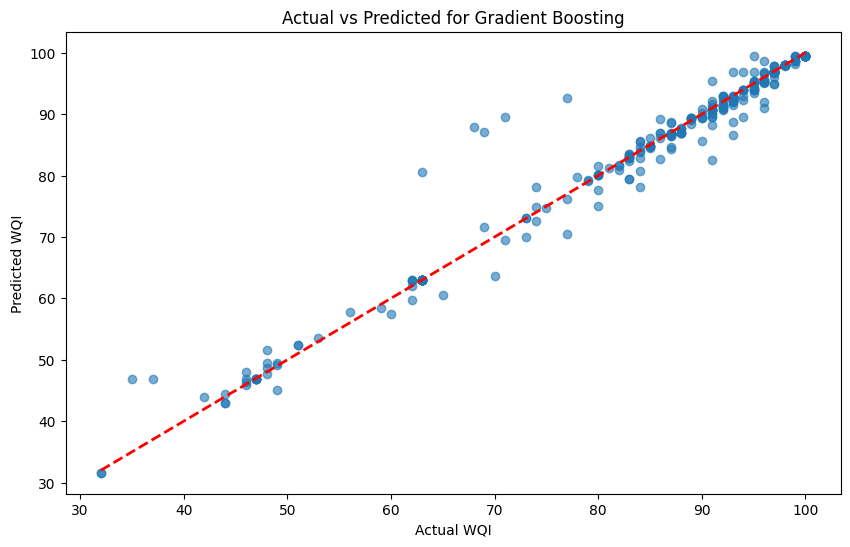

Training XGBoost...

--- XGBoost Model Evaluation ---
Training/Prediction Duration: 0.00 seconds
MAE: 1.0886, MSE: 7.5802, RMSE: 2.7532, R^2: 0.9673, MAPE: 1.53%


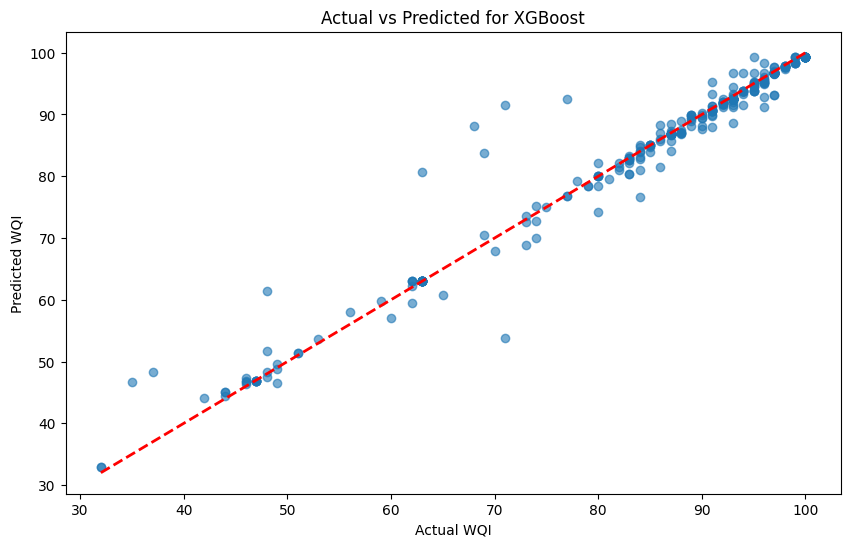

Training SVR...

--- SVR Model Evaluation ---
Training/Prediction Duration: 0.02 seconds
MAE: 0.6702, MSE: 6.8621, RMSE: 2.6196, R^2: 0.9704, MAPE: 1.00%


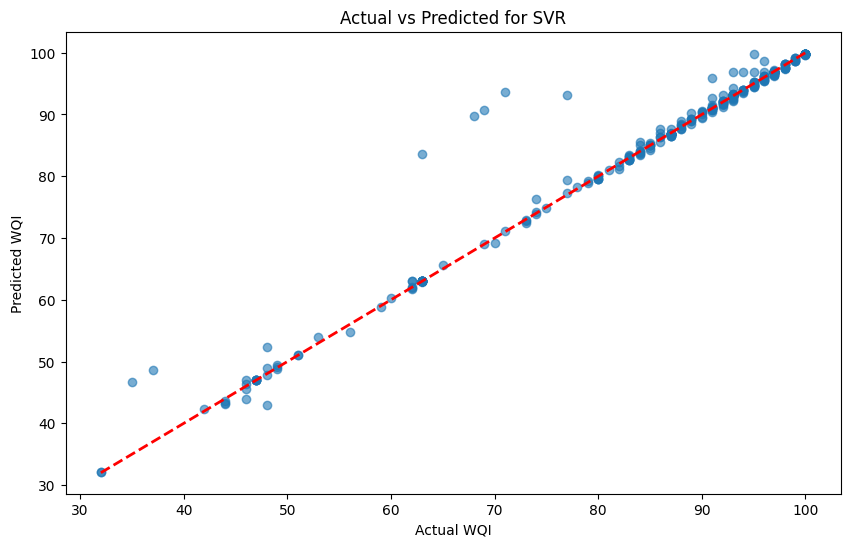

Training MLP...

--- MLP Model Evaluation ---
Training/Prediction Duration: 0.00 seconds
MAE: 1.0444, MSE: 7.5322, RMSE: 2.7445, R^2: 0.9675, MAPE: 1.53%


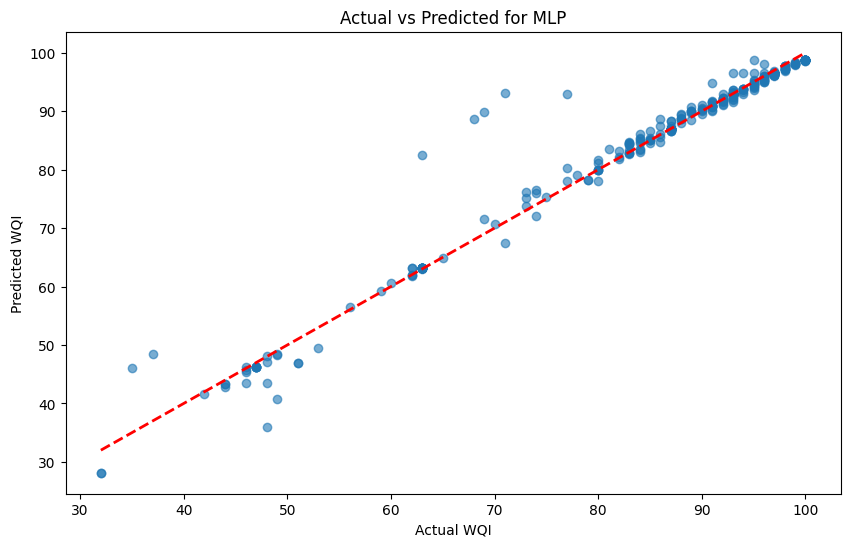

Training Linear Regression...

--- Linear Regression Model Evaluation ---
Training/Prediction Duration: 0.00 seconds
MAE: 1.1239, MSE: 8.3029, RMSE: 2.8815, R^2: 0.9642, MAPE: 1.74%


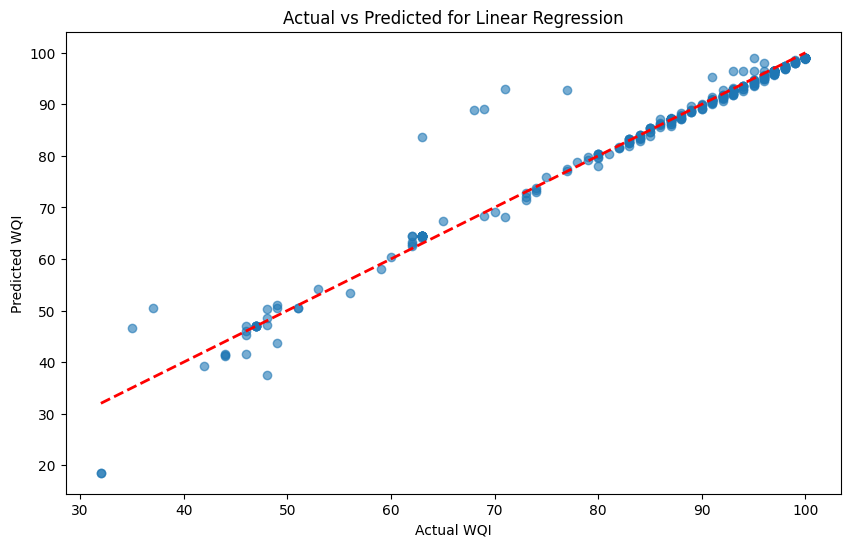

In [19]:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05, max_depth=5),
    'SVR': SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1),
    'MLP': MLPRegressor(hidden_layer_sizes=(64, 32, 16), activation='relu', solver='adam', max_iter=500, random_state=42),
    'Linear Regression': LinearRegression(n_jobs=-1)
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    # model.save(f'{name}.h5')# Upload to web
    # model_filename = f'{name.replace(" ", "_")}.zip'
    # full_save_path = os.path.join(drive_save_dir, model_filename)
    # print(f"Saving {name} to {full_save_path}...")
    # joblib.dump(model, full_save_path)
    evaluate_model(name, model, X_test_scaled, y_test)

LSTM

Epoch 5/100 - Loss: 6358.9473, Val Loss: 5957.4536
Epoch 10/100 - Loss: 3768.8953, Val Loss: 5006.8848
Epoch 15/100 - Loss: 1361.3051, Val Loss: 2759.5894
Epoch 20/100 - Loss: 267.1024, Val Loss: 308.0779
Epoch 25/100 - Loss: 41.8253, Val Loss: 11.5047
Epoch 30/100 - Loss: 19.9552, Val Loss: 7.8239
Epoch 35/100 - Loss: 19.4490, Val Loss: 8.9844
Epoch 40/100 - Loss: 18.6039, Val Loss: 7.2187
Epoch 45/100 - Loss: 17.9904, Val Loss: 7.2405
Epoch 50/100 - Loss: 18.7989, Val Loss: 9.6365
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

--- LSTM Model Evaluation ---
Training/Prediction Duration: 0.55 seconds
MAE: 0.9119, MSE: 7.1803, RMSE: 2.6796, R^2: 0.9690, MAPE: 1.38%


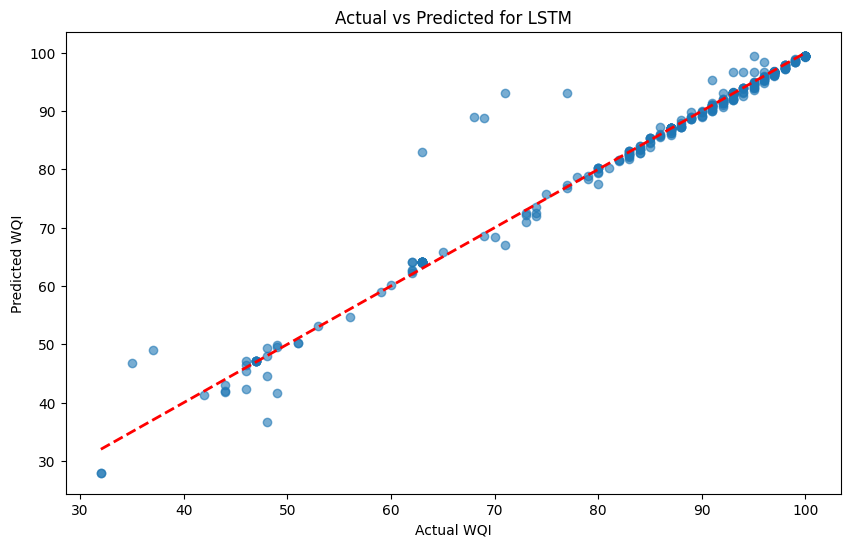

In [20]:
# Define callback class
class PrintEvery5Epochs(Callback):
    def __init__(self, total_epochs):
        super(PrintEvery5Epochs, self).__init__()
        self.total_epochs = total_epochs  # Store total epochs

    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if (epoch + 1) % 5 == 0:  # Print every 5 epochs
            loss = logs.get('loss', float('nan'))  # Avoid KeyError
            val_loss = logs.get('val_loss', float('nan'))
            print(f"Epoch {epoch+1}/{self.total_epochs} - Loss: {loss:.4f}, Val Loss: {val_loss:.4f}")

# Create callback instance
print_callback = PrintEvery5Epochs(100)

# LSTM Model
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm_model = Sequential([
    Input(shape=(1, X_train_scaled.shape[1])),
    LSTM(50, return_sequences=False),
    Dropout(0.1),
    BatchNormalization(),
    Dense(1)
])

lstm_model.compile(optimizer=AdamW(learning_rate=0.001), loss='mean_squared_error')

# Add callback to training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstm_model.fit(X_train_lstm, y_train,
               epochs=100,
               batch_size=32,
               validation_data=(X_test_lstm, y_test),
               callbacks=[early_stopping, print_callback],  # Add print callback
               verbose=0)
# full_save_path = os.path.join(drive_save_dir, "lstm_model.zip")
# joblib.dump(lstm_model, full_save_path)
# Evaluate model
evaluate_model('LSTM', lstm_model, X_test_lstm, y_test)


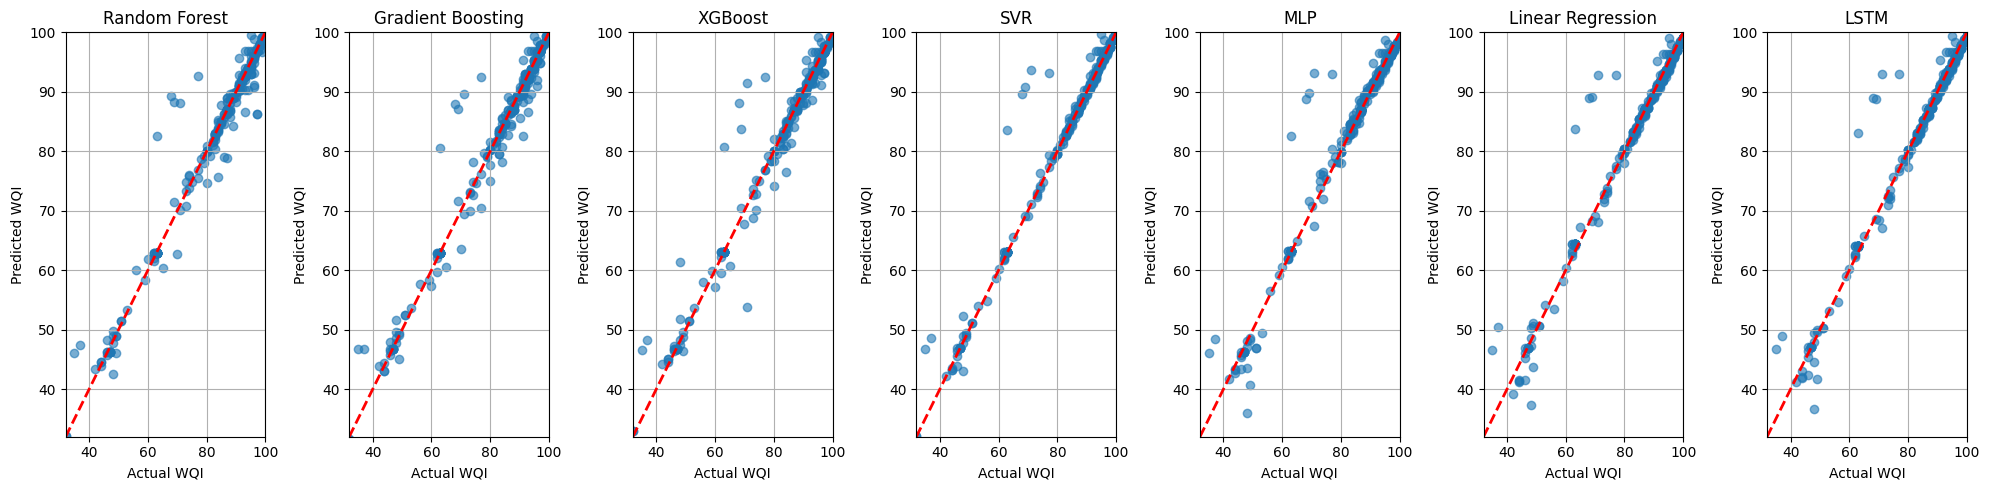

In [21]:
num_models = len(o)  # Number of models you have predictions for
plt.figure(figsize=(20, 5))  # Set the overall figure size

for i, item in enumerate(o):
    plt.subplot(1, num_models, i + 1)  # Create a subplot for each model
    plt.scatter(y_test, o[item], alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Identity line
    plt.title(item)
    plt.xlabel('Actual WQI')
    plt.ylabel('Predicted WQI')
    plt.xlim(y_test.min(), y_test.max())
    plt.ylim(y_test.min(), y_test.max())
    plt.grid()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

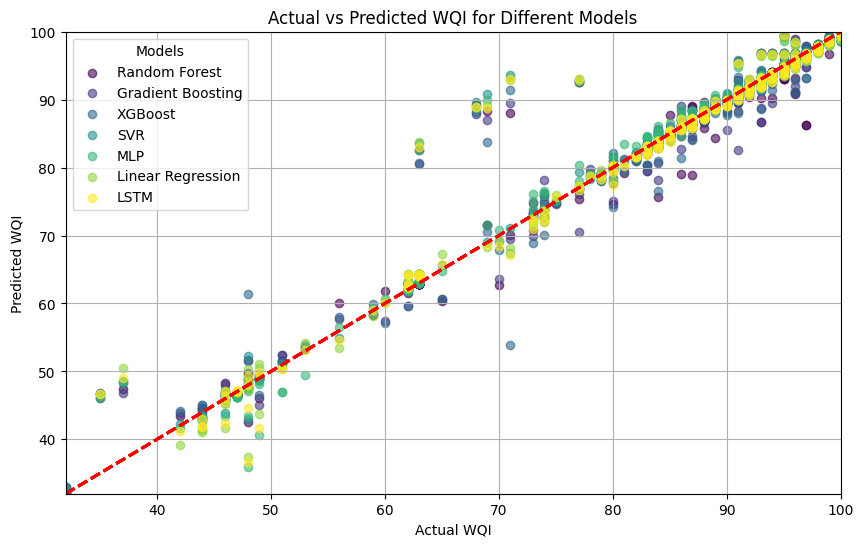

In [22]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a color map for different models
colors = plt.cm.viridis(np.linspace(0, 1, len(o)))  # Generate a color map

for i, item in enumerate(o):
    # Scatter plot for actual vs predicted values for each model
    plt.scatter(y_test, o[item], alpha=0.6, label=item, color=colors[i])

    # Line for perfect predictions
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Identity line

# Customize the plot
plt.title('Actual vs Predicted WQI for Different Models')
plt.xlabel('Actual WQI')
plt.ylabel('Predicted WQI')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.legend(title='Models')  # Add a legend for model identification

# Show the plot
plt.show()

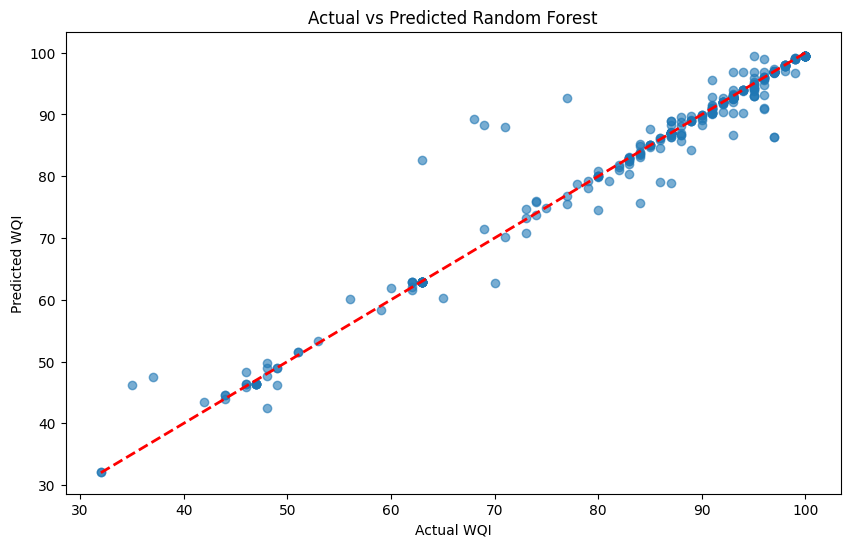

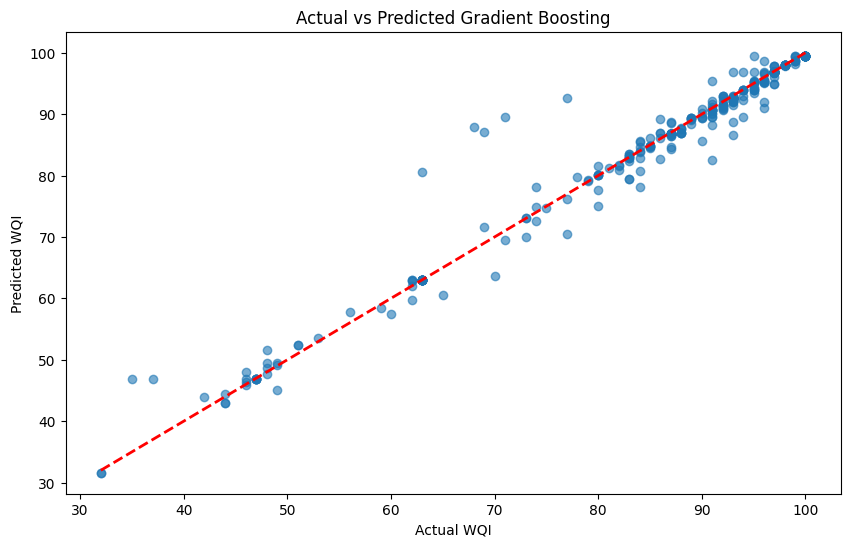

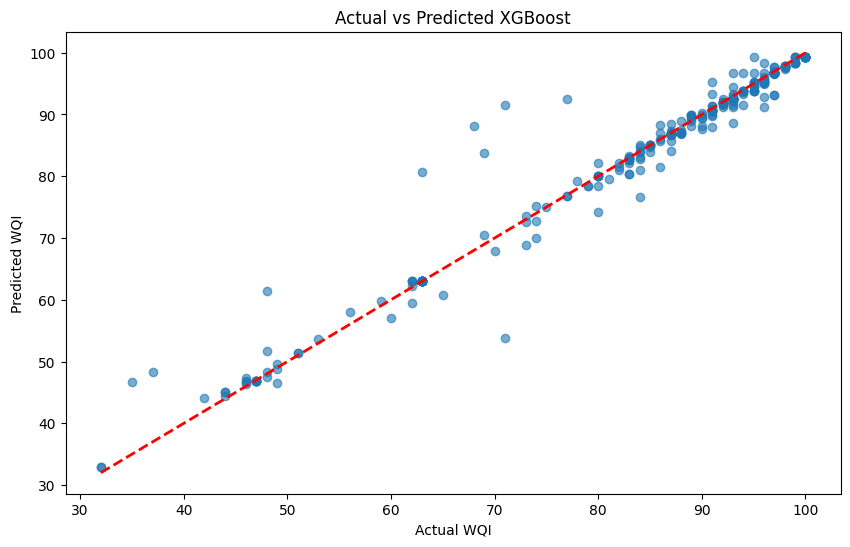

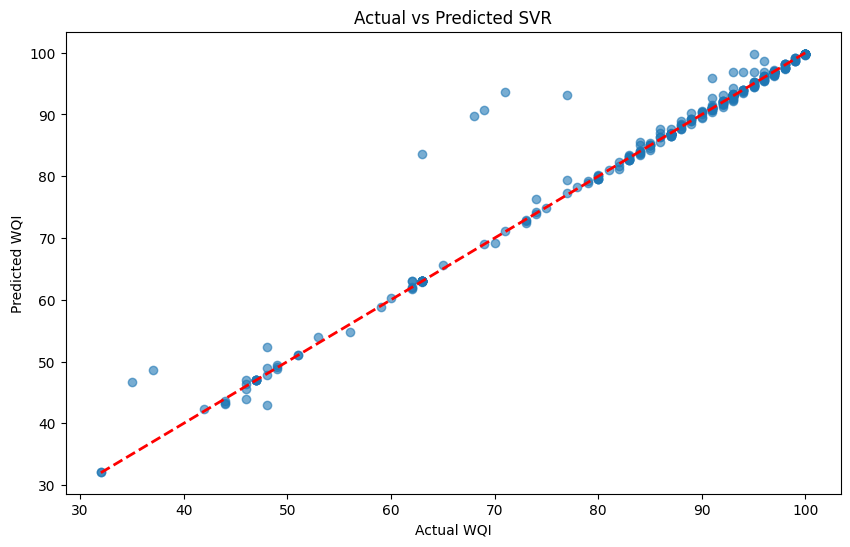

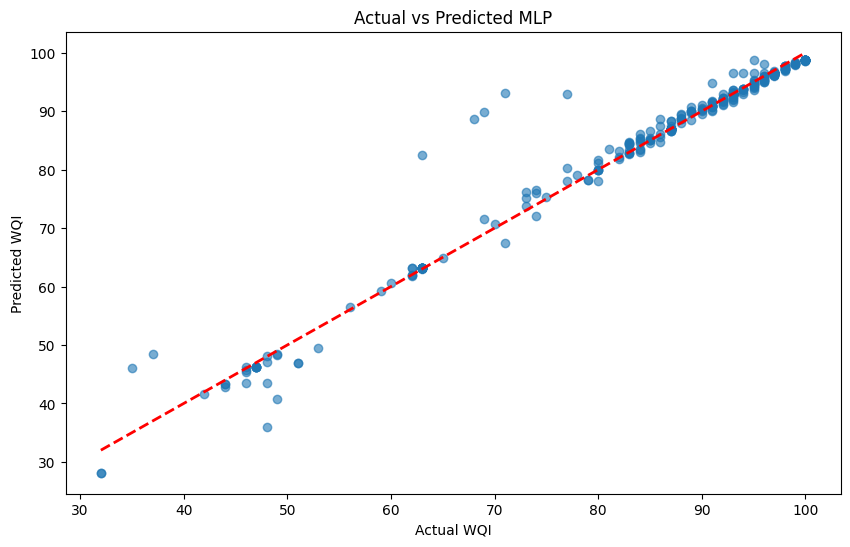

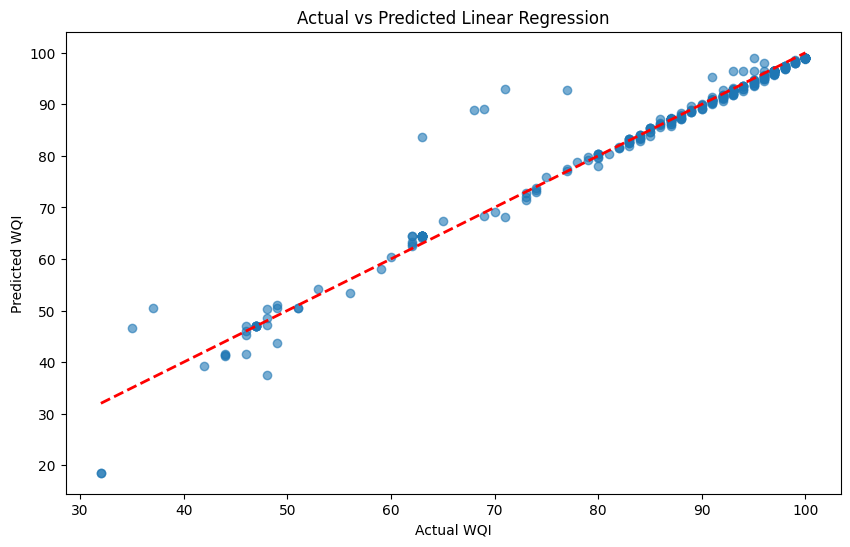

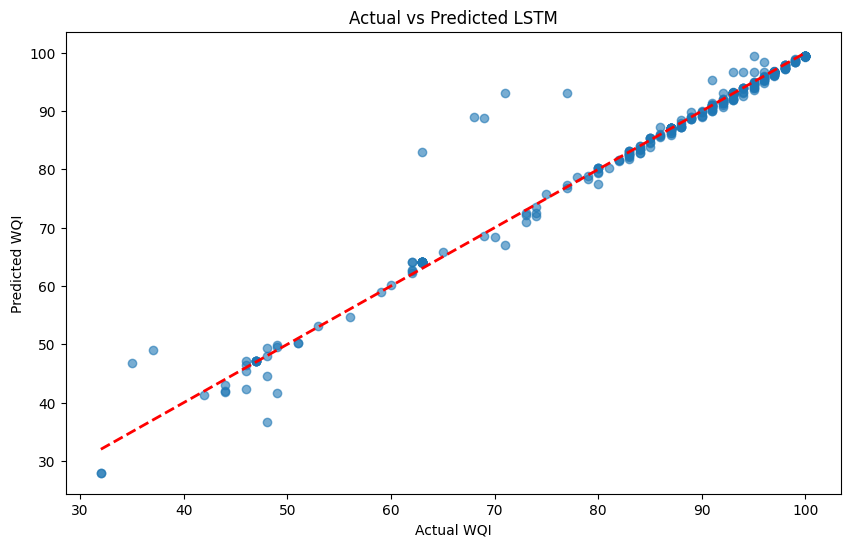

In [23]:
for item in o:
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, o[item], alpha=0.6)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
  plt.title('Actual vs Predicted '+item)
  plt.xlabel('Actual WQI')
  plt.ylabel('Predicted WQI')
  plt.show()

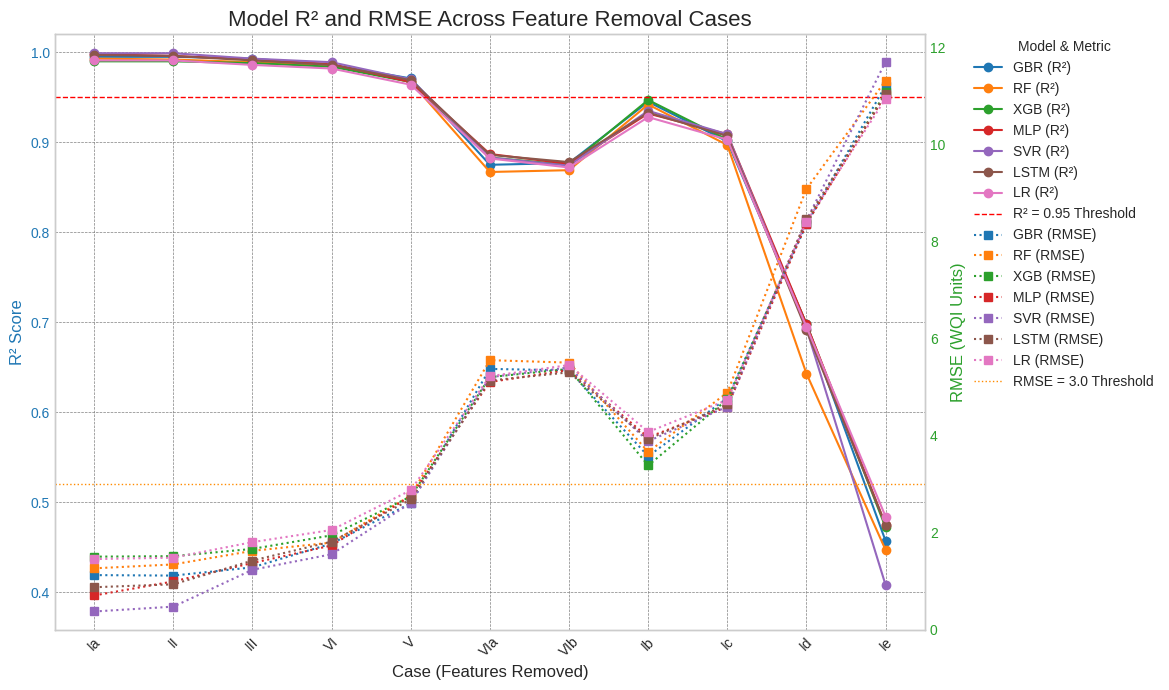

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Recreate the data from the table (Same as before)
data = {
    ('GBR', 'R2'):   [0.995, 0.995, 0.993, 0.986, 0.971, 0.875, 0.877, 0.945, 0.901, 0.698, 0.457],
    ('GBR', 'MAE'):  [0.61,  0.60,  0.65,  0.79,  1.07,  2.20,  2.32,  1.21,  1.76,  5.29,  6.89 ],
    ('GBR', 'RMSE'): [1.13,  1.12,  1.29,  1.78,  2.61,  5.38,  5.35,  3.58,  4.78,  8.36,  11.22],
    ('RF', 'R2'):    [0.993, 0.992, 0.989, 0.986, 0.967, 0.867, 0.869, 0.942, 0.897, 0.643, 0.447],
    ('RF', 'MAE'):   [0.49,  0.54,  0.61,  0.68,  1.00,  2.15,  2.29,  1.10,  1.68,  5.87,  6.82 ],
    ('RF', 'RMSE'):  [1.27,  1.35,  1.63,  1.80,  2.77,  5.56,  5.51,  3.67,  4.89,  9.09,  11.32],
    ('XGB', 'R2'):   [0.990, 0.990, 0.988, 0.984, 0.967, 0.883, 0.875, 0.947, 0.903, 0.698, 0.472],
    ('XGB', 'MAE'):  [0.73,  0.73,  0.75,  0.81,  1.09,  2.10,  2.35,  1.21,  1.77,  5.35,  6.78 ],
    ('XGB', 'RMSE'): [1.51,  1.52,  1.67,  1.95,  2.75,  5.21,  5.38,  3.39,  4.75,  8.38,  11.08],
    ('MLP', 'R2'):   [0.998, 0.996, 0.992, 0.987, 0.967, 0.887, 0.876, 0.932, 0.909, 0.698, 0.475],
    ('MLP', 'MAE'):  [0.43,  0.64,  0.73,  0.67,  1.19,  2.21,  2.35,  1.11,  1.79,  5.33,  6.93 ],
    ('MLP', 'RMSE'): [0.71,  1.00,  1.38,  1.74,  2.76,  5.11,  5.36,  3.97,  4.60,  8.37,  11.03],
    ('SVR', 'R2'):   [0.999, 0.999, 0.993, 0.989, 0.970, 0.883, 0.874, 0.935, 0.909, 0.693, 0.408],
    ('SVR', 'MAE'):  [0.25,  0.28,  0.38,  0.44,  0.67,  1.34,  1.50,  0.84,  1.07,  4.93,  4.478],
    ('SVR', 'RMSE'): [0.38,  0.48,  1.24,  1.56,  2.62,  5.21,  5.41,  3.89,  4.60,  8.44,  11.71],
    ('LSTM', 'R2'):  [0.997, 0.996, 0.991, 0.986, 0.969, 0.886, 0.878, 0.933, 0.907, 0.691, 0.475],
    ('LSTM', 'MAE'): [0.43,  0.51,  0.60,  0.71,  1.09,  2.24,  2.22,  1.20,  1.88,  5.35,  6.67 ],
    ('LSTM', 'RMSE'):[0.88,  0.94,  1.43,  1.82,  2.69,  5.14,  5.31,  3.93,  4.65,  8.46,  11.04 ],
    ('LR', 'R2'):    [0.991, 0.991, 0.986, 0.982, 0.964, 0.882, 0.872, 0.928, 0.903, 0.695, 0.484],
    ('LR', 'MAE'):   [0.68,  0.72,  0.79,  0.84,  1.12,  2.23,  2.42,  1.42,  1.80,  5.33,  6.79 ],
    ('LR', 'RMSE'):  [1.46,  1.49,  1.81,  2.06,  2.88,  5.23,  5.46,  4.08,  4.74,  8.41,  10.95],
}

# Define the order of cases
cases = ['Ia', 'II', 'III', 'VI', 'V', 'VIa', 'VIb', 'Ib', 'Ic', 'Id', 'Ie']

# Create DataFrame (Corrected structure)
df = pd.DataFrame(data, index=cases)
df.columns.names = ['Model', 'Metric']

# 2. Create Combined Plot with Secondary Y-Axis
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 7)) # Create figure and primary axis

# --- Plot R² on Primary Axis (ax1) ---
color_r2 = 'tab:blue'
ax1.set_xlabel('Case (Features Removed)', fontsize=12)
ax1.set_ylabel('R² Score', color=color_r2, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color_r2)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')

# Select R² data
r2_data = df.loc[:, pd.IndexSlice[:, 'R2']]

# Plot R² for each model on ax1
lines1 = [] # To store line objects for legend
labels1 = [] # To store labels for legend
for model in r2_data.columns.get_level_values('Model'):
    line, = ax1.plot(cases, r2_data[(model, 'R2')], marker='o', linestyle='-', label=f'{model} (R²)')
    lines1.append(line)
    labels1.append(f'{model} (R²)') # Add metric to label

# Add R² = 0.95 threshold line to ax1
thresh1 = ax1.axhline(y=0.95, color='red', linestyle='--', linewidth=1, label='R² = 0.95 Threshold')
lines1.append(thresh1)
labels1.append('R² = 0.95 Threshold')

# Adjust R² y-limits dynamically
min_r2_val = r2_data.min().min()
ax1.set_ylim(bottom=min(0.4, min_r2_val - 0.05), top=1.02)

# --- Plot RMSE on Secondary Axis (ax2) ---
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color_rmse = 'tab:green'
ax2.set_ylabel('RMSE (WQI Units)', color=color_rmse, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color_rmse)
ax2.grid(False) # Turn off grid for secondary axis to avoid clutter

# Select RMSE data
rmse_data = df.loc[:, pd.IndexSlice[:, 'RMSE']]

# Plot RMSE for each model on ax2
lines2 = []
labels2 = []
for model in rmse_data.columns.get_level_values('Model'):
    # Use different linestyle/marker for RMSE
    line, = ax2.plot(cases, rmse_data[(model, 'RMSE')], marker='s', linestyle=':', label=f'{model} (RMSE)')
    lines2.append(line)
    labels2.append(f'{model} (RMSE)') # Add metric to label

# Add RMSE = 3.0 threshold line to ax2
thresh2 = ax2.axhline(y=3.0, color='darkorange', linestyle=':', linewidth=1, label='RMSE = 3.0 Threshold')
lines2.append(thresh2)
labels2.append('RMSE = 3.0 Threshold')

ax2.set_ylim(bottom=0) # Start RMSE axis at 0

# --- Final Touches ---
plt.title('Model R² and RMSE Across Feature Removal Cases', fontsize=16)

# Combine legends from both axes
# Note: Manually creating labels as above is often clearer than combining get_legend_handles_labels()
#       when lines might overlap visually. Let's try combining handles/labels directly.
lines = ax1.get_lines() + ax2.get_lines()
# Extract labels directly from the line objects
labels = [line.get_label() for line in lines]
# Place legend outside
ax1.legend(lines, labels, title='Model & Metric', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

fig.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
plt.show()